# k-means练习

## 应用一: 数据聚类

### 引入相关库

In [35]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [36]:
mat = loadmat('./ex7/ex7data2.mat')
mat

{'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.24399257],
        [ 1.01732013,  4.84473647],
        [ 2.17893568,  5.29758701],
        [ 2.85962615,  5.26041997],
        [ 1.30882588,  

### 根据中心点对每个样本点进行聚类

In [37]:
def findClosestCentroids(Datas, centroids):  # Datas:array, centroids:array
    max_dist = np.inf  # 定义最大距离
    clustering = []  # 储存聚类结果
    # 遍历每个样本点
    for i in range(len(Datas)):
        data = Datas[i]
        diff = data - centroids   # 数据类型都为np.array
        dist = 0
        for j in range(len(diff[0])):
            dist += diff[:,j]**2   # 求欧式距离
        min_index = np.argmin(dist)  # 找出距离最小的下标
        clustering.append(min_index)
    return np.array(clustering)

In [38]:
X = mat['X']
centroids = np.array([[3,3], [6,2], [8,5]])  
# 测试
clusted = findClosestCentroids(X, centroids)
clusted[:5]

array([0, 2, 1, 0, 0], dtype=int64)

### 根据分类重新计算中心点

In [39]:
def computMeans(Datas, clustering):
    centroids = []
    for i in range(len(np.unique(clustering))):  # np.unique计算聚类个数
        u_k = np.mean(Datas[clustering==i], axis=0)  # 求每列的平均值
        centroids.append(u_k)
    return np.array(centroids)

In [40]:
centroids = computMeans(X, clusted)
centroids

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

### 原始数据展示

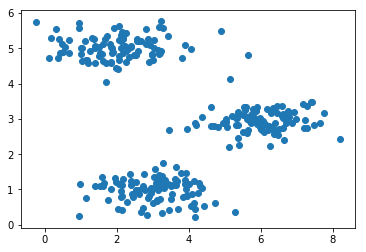

In [41]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### 展示最终聚类结果和中心点变化

In [42]:
# 定义可视化函数 
def plotdata(data, centroids, clusted=None):   # data:数据， centroids:迭代后所有中心点， clusted:最后一次聚类结果
    colors = ['b','g','gold','darkorange','salmon','olivedrab', 
              'maroon', 'navy', 'sienna', 'tomato', 'lightgray', 'gainsboro'
             'coral', 'aliceblue', 'dimgray', 'mintcream', 'mintcream']  # 定义颜色，用不同颜色表示聚类结果
    
    assert len(centroids[0]) <= len(colors), 'colors are not enough '  # 检查颜色和中心点维度
    
    clust_data = []  # 存储聚好类的数据,同一个类放在同一个列表中
    if clusted is not None: 
        for i in range(centroids[0].shape[0]):
            x_i = data[clusted==i]
            clust_data.append(x_i)  # x_i is np.array
    else:
        clust_data = [data]  # 未进行聚类，默认将其作为一个类
     
    # 用不同颜色绘制数据点
    plt.figure(figsize=(8,5)) 
    for i in range(len(clust_data)):
        plt.scatter(clust_data[i][:, 0], clust_data[i][:, 1], color=colors[i], label='cluster %d'%(i+1))
        
    plt.legend()
    plt.xlabel('x', size=14)
    plt.ylabel('y', size=14)
    
    # 绘制中心点
    centroid_x = [] 
    centroid_y = []
    for centroid in centroids:
        centroid_x.append(centroid[:,0])
        centroid_y.append(centroid[:,1])
    plt.plot(centroid_x, centroid_y, 'r*--', markersize=14)
    plt.show()
    

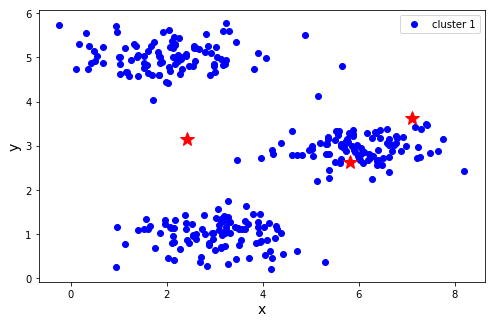

In [43]:
# 测试
plotdata(X, [centroids])

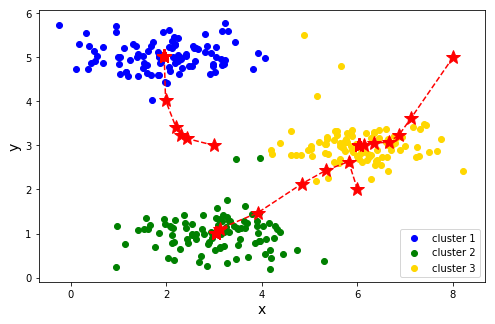

In [44]:
# 进行训练
def run_k_means(Datas, centroids, iters):
    all_centroids = [centroids]
    for i in range(iters):
        clusted = findClosestCentroids(Datas, centroids)
        centroids = computMeans(Datas, clusted)
        all_centroids.append(centroids)
    return clusted, all_centroids

clusted, all_centroids = run_k_means(X, np.array([[3,3], [6,2], [8,5]]), 30)

plotdata(X, all_centroids, clusted)

### 随机初始化质心

In [45]:
# 方案一 先找出数据集每一列的最大值和最小值，然后在最大和最小之间随机生成
def randCent(Datas, k):
    n = np.shape(Datas)[1]  # 数据集维度
    centroids = np.mat(np.zeros((k, n)))  # 给质心赋0值
    for i in range(n):
        min_i = min(Datas[:, i])
        range_i = float(max(Datas[:, i]) - min_i)
        centroids[:, i] = min_i + range_i*np.random.rand(k, 1)
    return np.array(centroids)

In [46]:
randCent(X, 3)

array([[1.62435523, 2.06783484],
       [2.95270235, 4.22115744],
       [0.29111082, 2.67894269]])

In [47]:
# 方案二 从数据集去随机选取K个样本作为初始质心
def randCent(Datas, k):
    n = Datas.shape[0]
    random_index = np.random.choice(n, k)
    centroids = Datas[random_index]
    return centroids
randCent(X, 3)

array([[1.75164337, 0.68853536],
       [6.05086942, 2.80702594],
       [5.03611162, 2.92486087]])

## 应用二：图片压缩

In [48]:
from skimage import io

### 引入图片

In [49]:
sample_image = io.imread('./ex7/bird_small.png')
sample_image.shape

(128, 128, 3)

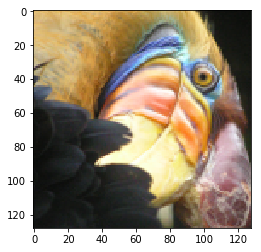

In [50]:
plt.imshow(sample_image)
plt.show()

### 归一化

In [51]:
sample_image = sample_image/255   # 将数据归一化到0-1

In [52]:
data = sample_image.reshape(-1, 3)  # 将图片像素大小重置，每一个像素点代表一个样本
print(data[:3])
print(data.shape)
k = 16  #  聚类个数
centroids = randCent(data, k)  # 随机初始化质心
centroids

[[0.85882353 0.70588235 0.40392157]
 [0.90196078 0.7254902  0.45490196]
 [0.88627451 0.72941176 0.43137255]]
(16384, 3)


array([[0.81568627, 0.71372549, 0.47843137],
       [0.43921569, 0.5372549 , 0.78823529],
       [0.22352941, 0.21176471, 0.19607843],
       [0.99215686, 0.96862745, 0.82745098],
       [0.22352941, 0.21568627, 0.2       ],
       [0.09019608, 0.09411765, 0.07843137],
       [0.55686275, 0.37647059, 0.11764706],
       [1.        , 0.82745098, 0.76078431],
       [0.62745098, 0.49019608, 0.43921569],
       [0.10196078, 0.10588235, 0.09019608],
       [0.7254902 , 0.66666667, 0.44313725],
       [0.28627451, 0.30588235, 0.29411765],
       [0.58039216, 0.44705882, 0.16078431],
       [0.39215686, 0.31764706, 0.23921569],
       [0.83921569, 0.74117647, 0.78039216],
       [0.66666667, 0.43529412, 0.09411765]])

In [53]:
# 对其进行聚类， 迭代次数为30次
clusted, all_centroids = run_k_means(data, centroids, 30)

### 重构图片

In [54]:
img = np.zeros(data.shape)  # 初始化图片
last_centroids = all_centroids[-1]  # 最后一聚类质心
for i in range(len(last_centroids)):  # 利用聚类质心替换图片中元素
    img[clusted==i] = last_centroids[i]

img = img.reshape(128, 128, 3)  # 转换大小

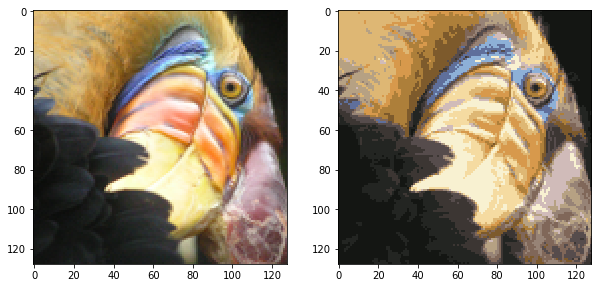

In [55]:
# 绘制图片
fig, axs = plt.subplots(1, 2, figsize=(10,6))
axs[0].imshow(sample_image)
axs[1].imshow(img)
plt.show()